In [4]:
import os
import re
import sys
import argparse
import subprocess
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.output_wrapper, .output {    height:auto !important;max-height:1000px;  /* your desired max-height here */}.output_scroll {    box-shadow:none !important;    webkit-box-shadow:none !important;}</style>"))

#import tqdm

Text(0.5,1,'Number of classes')

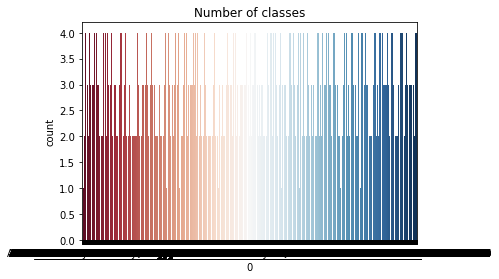

In [5]:
import seaborn as sns
data = pd.read_csv("./train_list.txt", header=None)

a = []
for x in data[0]:
    a.append("_".join(x.split(".")[:2]))
    
data[0] = np.array(a)
data.head()

sns.countplot(x=0, palette='RdBu', data=data)
plt.title('Number of classes')


In [93]:
def sum_apply(df):
    return sum(df)

data_name = pd.read_csv("./train_list.txt", header=None)
a = []
for x in data_name[0]:
    a.append("_".join(x.split(".")[:2]))
    
data_name[0] = np.array(a)

print(len(data_name[0]))

data_N = pd.read_csv("./train_N_fasta_in_files.txt", header=None)
print(len(data_N[0]))

print("")
df = pd.DataFrame({"Name": list(data_name[0]), "Count": list(data_N[0])[1:]})
print(len(df["Name"]))

df1 = df.groupby('Name').agg(sum_apply)


#df1['Name'], df1['Count'] = df1['Count'].str().split(' ', 1).str
df1.head()

28612
28613

28612


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [97]:
% load_ext rpy2.ipython
import rpy2.robjects as robj

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


[1] 28612
[1] 872
[1] 228
[1] 499746


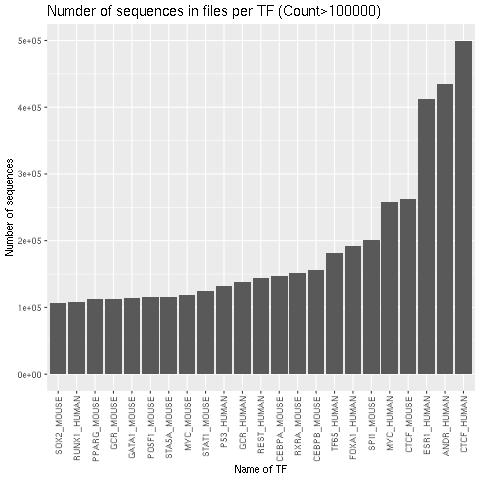

In [207]:
%%R
library(readr)
library(dplyr)
library(tidyr)
library(magrittr)
library(ggrepel)
library(ggpubr)
library(reshape2)
library(data.table)
library(ggplot2)
library(forcats)
library(stringr)

train_N_fasta_in_files <- read_csv("~/Desktop/TF_motives/train_N_fasta_in_files.txt")
#head(train_N_fasta_in_files)
train_list <- read_csv("/home/pavel/Desktop/TF_motives/train_list.txt", col_names = FALSE)
#head(train_list)

train_list$Count = train_N_fasta_in_files$"0"
colnames(train_list)[colnames(train_list)=="X1"] <- "Names"
print(nrow(train_list))

train_list$Names = gsub(".PEAKS.+", "\\1", train_list$Names)

train_list_plot = train_list %>% group_by(Names) %>% summarize(Count = sum(Count))
print(nrow(train_list_plot))

head(train_list_plot)
print(min(train_list_plot$Count))
print(max(train_list_plot$Count))

ggplot(train_list_plot %>% filter(Count>100000), aes(x=fct_reorder(Names ,Count), y=Count)) +
  geom_histogram(stat="identity") +
  theme(axis.text.x = element_text(angle = 90, vjust=0.5, hjust = 1)) +
  ggtitle('Numder of sequences in files per TF (Count>100000)') +
  labs(x = "Name of TF", y = "Number of sequences") +
  scale_fill_gradient(low ='light blue', high='navyblue')+
  theme(text = element_text(size = 18),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.x = element_blank())



[1] 28612
[1] 872
[1] 2
[1] 1004


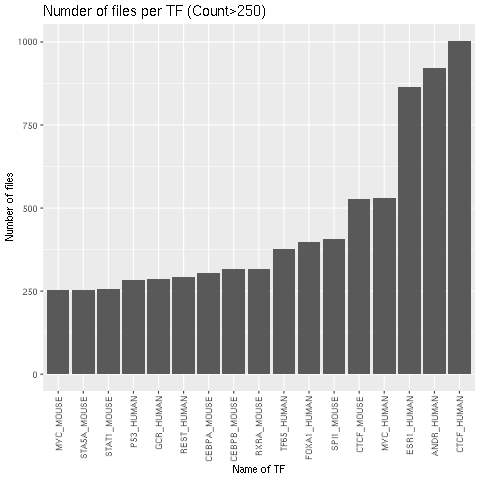

In [206]:
%%R
library(readr)
library(dplyr)
library(tidyr)
library(magrittr)
library(ggrepel)
library(ggpubr)
library(reshape2)
library(data.table)
library(ggplot2)
library(forcats)
library(stringr)

train_N_fasta_in_files <- read_csv("~/Desktop/TF_motives/train_N_fasta_in_files.txt")
#head(train_N_fasta_in_files)
train_list <- read_csv("/home/pavel/Desktop/TF_motives/train_list.txt", col_names = FALSE)
#head(train_list)

train_list$Count = train_N_fasta_in_files$"0"
colnames(train_list)[colnames(train_list)=="X1"] <- "Names"
print(nrow(train_list))

train_list$Names = gsub(".PEAKS.+", "\\1", train_list$Names)

train_list_plot = train_list %>% group_by(Names) %>% summarize(Count = n())
print(nrow(train_list_plot))

head(train_list_plot)
print(min(train_list_plot$Count))
print(max(train_list_plot$Count))

ggplot(train_list_plot %>% filter(Count>250), aes(x=fct_reorder(Names ,Count), y=Count)) +
  geom_histogram(stat="identity") +
  theme(axis.text.x = element_text(angle = 90, vjust=0.5, hjust = 1)) +
  ggtitle('Numder of files per TF (Count>250)') +
  labs(x = "Name of TF", y = "Number of files") +
  scale_fill_gradient(low ='light blue', high='navyblue')+
  theme(text = element_text(size = 18),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.major.x = element_blank())



In [7]:
root = os.path.abspath('./')
#print(root)
inputdir = os.path.abspath('train/')
#print(inputdir)
outputdir = os.path.abspath('temp/result')

if not os.path.exists(outputdir):
    os.makedirs(outputdir)

files_train = [f for f in os.listdir(inputdir) if os.path.splitdrive(f)[1].split(".")[0] == 'ANDR_HUMAN']
files_test = [f for f in os.listdir(inputdir) if os.path.splitdrive(f)[1].split(".")[0] != 'ANDR_HUMAN']
files_all = [f for f in os.listdir(inputdir) if os.path.splitext(f)[1] == '.mfa']

#print(files_train)
#print(files_test)
pwm = os.path.abspath('pwm/mono/ANDR_HUMAN/')
files_pwm = [f for f in os.listdir(pwm) if os.path.splitext(f)[1] == '.pwm']
#print("_".join(files_pwm[0].split("~")[2].split(".")[:-1]))

In [4]:
#files_pwm

In [8]:
#indexing mfa files

from itertools import groupby

def fasta_iter(f):
    faiter = (x[1] for x in groupby(f, lambda line: line[0] == ">"))

    for header in faiter:
        headerStr = header.__next__()[1:].strip()
        seq = "".join(s.strip() for s in faiter.__next__())
        yield (headerStr, seq)


In [6]:
outfile = open(outputdir + "/all_mfa_indexing_file.fasta", "w")        
index_global = 0
for i in files_all:
    headerStr_base = "_".join(i.split(".")[:-1])
    #print(headerStr_base)
    with open(inputdir + "/" + i, "r") as f:
        fiter = fasta_iter(f)
        index_local = 0
        for seq_rec in fiter:
            headerStr_new = headerStr_base + "_globalInd_" + str(index_global) + "_localInd_" + str(index_local)
            headerStr, seq = seq_rec
            outfile.write(">" + headerStr_new + "\n" + seq + "\n")
            index_local += 1
    index_global += 1
    #break

outfile.close()

In [7]:
!awk 'NF' ~/temp/result/all_mfa_indexing_file.fasta > ~/temp/result/all_mfa_indexing_file_no_NF.fasta

In [8]:
good_file = open(root + "/good_files.txt", "r") 
good_lines = [x for x in good_file.read().strip().split()]
#print(good_lines)

In [9]:
f = open(outputdir + "/all_mfa_indexing_file_no_NF.fasta", "r") 
fiter = fasta_iter(f)
for seq_rec in fiter:
    headerStr, seq = seq_rec
    #print(headerStr)    

In [10]:
o = 0
for i in files_pwm:
    #print(i, ".".join(i.split("~")[2].split(".")[:-1]))
    #break
    if ".".join(files_pwm[0].split("~")[2].split(".")[:-1]) in good_lines:
        line = 'java -Xmx2G -cp {sarsus_home} ru.autosome.SARUS {mfa_file} {matrix} --skipn --show-non-matching --output-scoring-mode score besthit > {out_file}'.format(sarsus_home = root + "/sarus/releases/sarus-2.0.1.jar",
        mfa_file = '/'.join([outputdir, "all_mfa_indexing_file_no_NF.fasta"]),
        matrix = '/'.join([pwm, i]),
        out_file = '/'.join([outputdir, "_".join(files_pwm[0].split("~")[2].split(".")[:-1]) + "_feature_compare_table.tab"]))
        p = subprocess.Popen(line, shell=True)
        print(line)
        p.wait()
        o += 1
        #break
        if o == 3:
            break
    else:
        print("NO!!!!!")
        

java -Xmx2G -cp /home/pavel-kravchenko/sarus/releases/sarus-2.0.1.jar ru.autosome.SARUS /home/pavel-kravchenko/temp/result/all_mfa_indexing_file_no_NF.fasta /home/pavel-kravchenko/pwm/mono/ANDR_HUMAN/ANDR_HUMAN~CM~ANDR_HUMAN.PEAKS033090.macs.M.pwm --skipn --show-non-matching --output-scoring-mode score besthit > /home/pavel-kravchenko/temp/result/ANDR_HUMAN_PEAKS033090_macs_M_feature_compare_table.tab
java -Xmx2G -cp /home/pavel-kravchenko/sarus/releases/sarus-2.0.1.jar ru.autosome.SARUS /home/pavel-kravchenko/temp/result/all_mfa_indexing_file_no_NF.fasta /home/pavel-kravchenko/pwm/mono/ANDR_HUMAN/ANDR_HUMAN~CM~ANDR_HUMAN.PEAKS033090.macs.S.pwm --skipn --show-non-matching --output-scoring-mode score besthit > /home/pavel-kravchenko/temp/result/ANDR_HUMAN_PEAKS033090_macs_M_feature_compare_table.tab
java -Xmx2G -cp /home/pavel-kravchenko/sarus/releases/sarus-2.0.1.jar ru.autosome.SARUS /home/pavel-kravchenko/temp/result/all_mfa_indexing_file_no_NF.fasta /home/pavel-kravchenko/pwm/mono/A

In [9]:
temp_result = [f for f in os.listdir(outputdir) if os.path.splitext(f)[1] == '.tab']
print(temp_result)

['ANDR_HUMAN_PEAKS033090_macs_M_feature_compare_table.tab']


In [10]:
f = open(outputdir + "/" + temp_result[0], "r") 
names = []
data = []
fiter = fasta_iter(f)
for seq_rec in fiter:
    headerStr, seq = seq_rec
    names.append(headerStr)
    data.append(seq.split()[1])
    #print(headerStr.split("_"))

In [11]:
data_tuples = list(zip(names,data))
df = pd.DataFrame(data_tuples, columns=['Name','Score'])

In [21]:
df.head(1000000)

,Name,Score
0,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,260
1,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,59
2,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,104
3,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,211
4,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,141
5,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,274
6,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,278
7,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,53
8,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,94
9,AEBP2_HUMAN_PEAKS034294_gem_train_globalInd_0_...,23


In [13]:
train_pos = ["_".join(x) == "ANDR_HUMAN" for x in df['Name'].str.split('_').str[:2]]
train_pos = df[train_pos]
train_pos.head()

,Name,Score
4461,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,158
4462,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,49
4463,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,128
4464,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,280
4465,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,132


In [22]:
train_neg = ["_".join(x) == "CTCF_HUMAN" for x in df['Name'].str.split('_').str[:2]]
train_neg = df[train_neg]
train_neg.head()

,Name,Score
799194,CTCF_HUMAN_PEAKS033146_gem_train_globalInd_166...,233
799195,CTCF_HUMAN_PEAKS033146_gem_train_globalInd_166...,41
799196,CTCF_HUMAN_PEAKS033146_gem_train_globalInd_166...,117
799197,CTCF_HUMAN_PEAKS033146_gem_train_globalInd_166...,265
799198,CTCF_HUMAN_PEAKS033146_gem_train_globalInd_166...,224


In [ ]:
#train_pos = [df.loc[i][0][:10] == "ANDR_HUMAN" for i in range(df.shape[0])]
#train_pos = df[train_pos]
#train_pos.head(10)
#print(train_pos)

In [ ]:
#train_neg = [df.loc[i][0][:10] != "ANDR_HUMAN" for i in range(df.shape[0])]
#train_neg = df[train_pos]
#train_neg.head(10)

In [23]:
arr1 = [1] * len(train_pos)
df1 = train_pos.assign(ind=arr1)
df1.head(10)

arr2 = [0] * len(train_neg)
df2 = train_neg.assign(ind=arr2)
df2.head(10)

result = pd.concat([df1, df2])
#result.head(10)
#print(len(result.iloc[:,1:2]))
result.head()

,Name,Score,ind
4461,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,158,1
4462,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,49,1
4463,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,128,1
4464,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,280,1
4465,ANDR_HUMAN_PEAKS033090_macs_train_globalInd_9_...,132,1


In [5]:
#result.head(1000001)

In [12]:
pd.DataFrame.to_csv(result, outputdir + "/work_table.csv")

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
X, Y = result["Score"].reshape(-1, 1), result["ind"].reshape(-1, 1) # X - features, y - +/- -> 1/0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

/usr/lib/python3.4/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [27]:
print(len(X))
print(len(Y))


467101
467101


In [25]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_test_predicted_proba = model.predict_proba(X_test)[:, 0]

/usr/lib64/python3.4/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print(roc_auc_score(y_score=Y_test_predicted_proba, y_true=Y_test))
print(average_precision_score(y_score=Y_test_predicted_proba, y_true=Y_test))

0.41144609492680684
0.40020166088199366


In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
result1 = result.sample(10000)
X = result1["Score"].reshape(-1, 1)
y = result1["ind"].reshape(-1, 1)


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()